# Title: Bank Marketing Using Logistic Regression

## About Dataset

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.

The classification goal is to predict if the client will subscribe a term deposit (variable y).

### Bank client data:

1 - age (numeric) 

2 - job : type of job (categorical)

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary") 

5 - default: has credit in default? (binary: "yes","no") 

6 - balance: average yearly balance, in euros (numeric) 

7 - housing: has housing loan? (binary: "yes","no") 

8 - loan: has personal loan? (binary: "yes","no")

9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 

10 - day: last contact day of the month (numeric) 

11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec") 

12 - duration: last contact duration, in seconds (numeric)

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) 

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted) 

15 - previous: number of contacts performed before this campaign and for this client (numeric) 

16 - poutcome (previous outcome): outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

### Output variable (desired target): 17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import  LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In the above code, We have imported the necessary libraries for our model

In [3]:
data = pd.read_csv('bank-full.csv', header=0)   # Load dataset into a variable called "data"

In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
data.shape      # Get the shape of dataset

(45211, 17)

### We have 17 Columns & 45211 Rows

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
data.isnull().sum()     # Finding the null values in our dataset

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There are no null values in our dataset

In [10]:
col_names = data.columns

col_names

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [11]:
# find categorical variables

categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 10 categorical variables

The categorical variables are : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [12]:
# Find numerical variables

numerical = [var for var in data.columns if data[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 7 numerical variables

The numerical variables are : ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [13]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [14]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

get count of yes & no from column "y"

## Now lets see Boxplot of given values

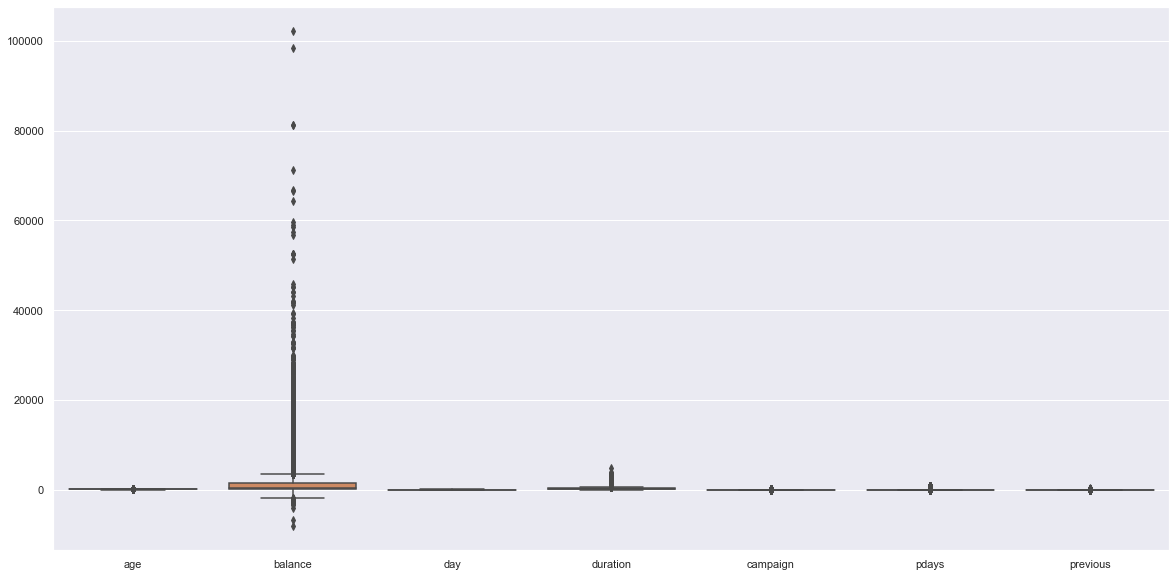

In [15]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=data)
plt.show()

From this boxplot , we can see that there are Outliers are present in different different columns , but most of outliers are there in "Balance" columns .

And it is possible also that every bank account may have different different amount.

In [18]:
#Define X and y
X = data.drop(['y','job','marital', 'education', 'contact', 
             'housing', 'loan', 'day', 'month', 'poutcome' ], axis=1)     # Independent variable

y = data['y']                                                             # Dependent variable

In [19]:
X.shape

(45211, 7)

In [21]:
X.value_counts()

age  default  balance  duration  campaign  pdays  previous
57   no        0       97        1         -1     0           3
38   no        0       71        1         -1     0           3
45   no        0       113       2         -1     0           3
34   no        0       150       1         -1     0           3
                       95        1         -1     0           2
                                                             ..
35   no       -258     219       1         -1     0           1
              -257     117       3         -1     0           1
                       312       7         -1     0           1
              -255     196       3          265   2           1
95   no        2282    207       17        -1     0           1
Length: 45147, dtype: int64

In [22]:
X['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [23]:
default={"no":0,"yes":1}

In [24]:
X["default"]=X["default"].replace(default)

We have replace values of column "default" to 0 & 1 , because we need numerical data for training the Model

In [25]:
y.shape

(45211,)

In [26]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [28]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression()

In [29]:
# fit the model
logreg.fit(X_train, y_train)

LogisticRegression()

In [30]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array(['no', 'yes', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [31]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8881


In [32]:
accuracy_test = accuracy_score(y_test,y_pred_test)
accuracy_test

0.8880828098734849

In [33]:
# print the scores on training and test set

print('Training Accuracy score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test Accuracy score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training Accuracy score: 0.8891
Test Accuracy score: 0.8881


In [34]:
conf_mat = confusion_matrix(y_test,y_pred_test)
conf_mat

array([[9843,  135],
       [1130,  195]], dtype=int64)

<AxesSubplot:>

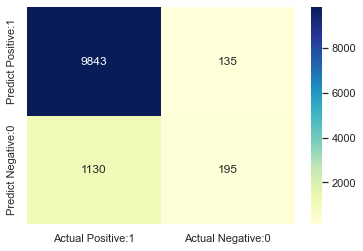

In [35]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=conf_mat, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')